<a href="https://colab.research.google.com/github/Nishika2900/YULU_CASE_STUDY/blob/alpha/YULU_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, f_oneway, norm, levene

# Reading the data
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
data.head()

# Displaying basic information about the dataset
data.info()
data.describe()

# Checking for null values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [8]:
df = data
# Dropping duplicates and converting datetime
df.drop_duplicates(inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
data.isnull().sum()
data.info()

# Removing outliers
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate quantiles for the numeric columns
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
df = numeric_data.loc[~((numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))).any(axis=1)]
print((numeric_data[numeric_data['holiday'] == 1]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  true_holiday  10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB
       season  holiday  workingday  weather   temp   atemp  

In [10]:
# Categorizing Data
df['season'] = df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weather'] = df['weather'].replace({1: 'level 1', 2: 'level 2', 3: 'level 3', 4: 'level 4'})


<ipython-input-10-0438f8d2bfc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
<ipython-input-10-0438f8d2bfc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather'] = df['weather'].replace({1: 'level 1', 2: 'level 2', 3: 'level 3', 4: 'level 4'})


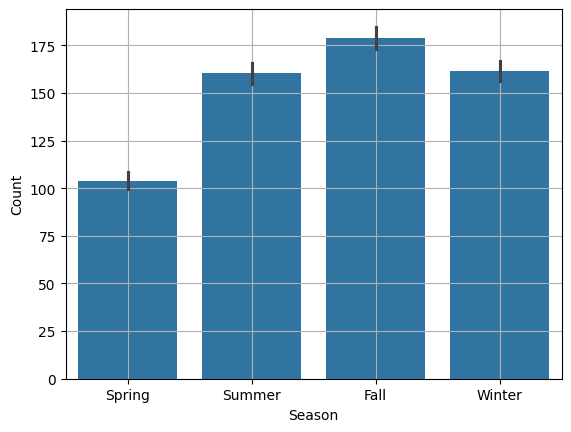

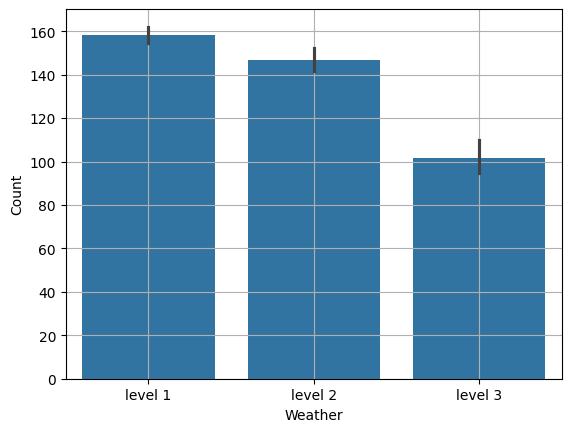

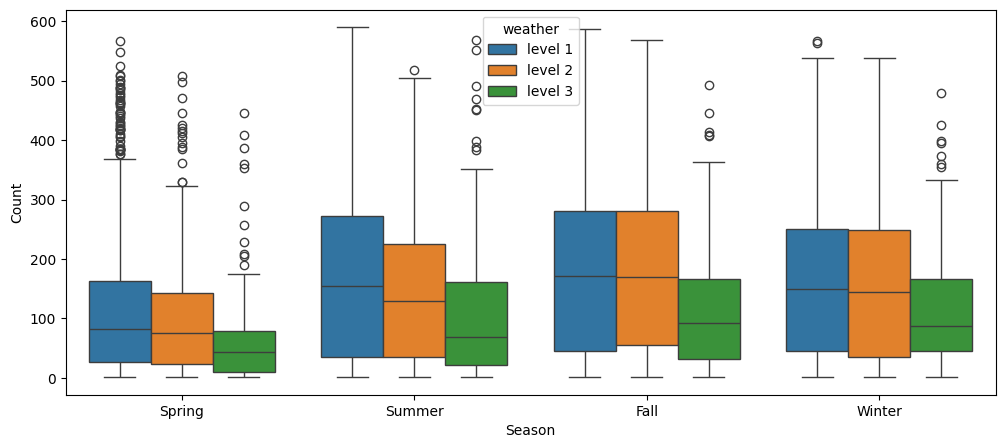

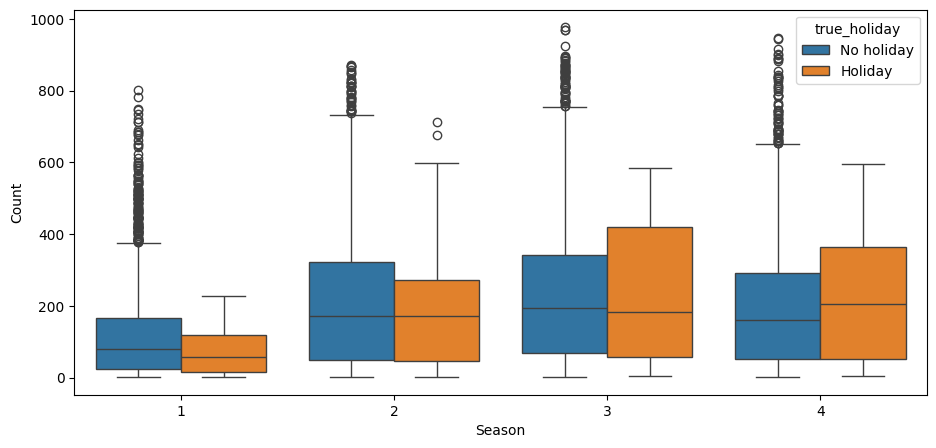

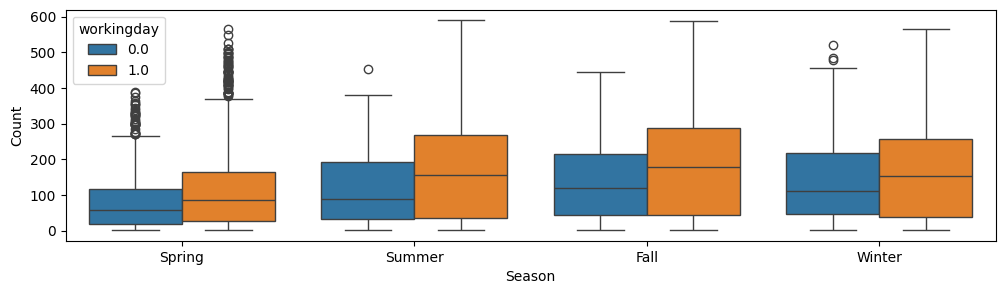

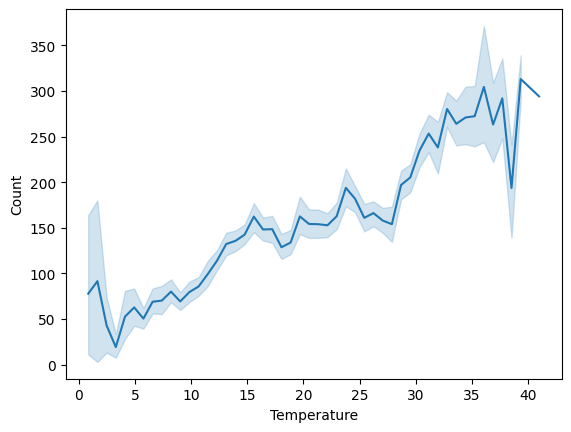

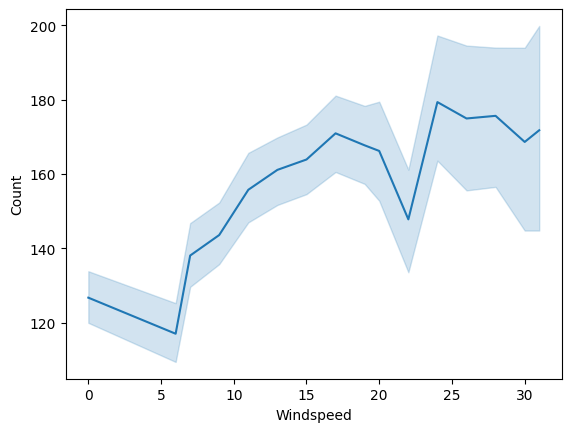

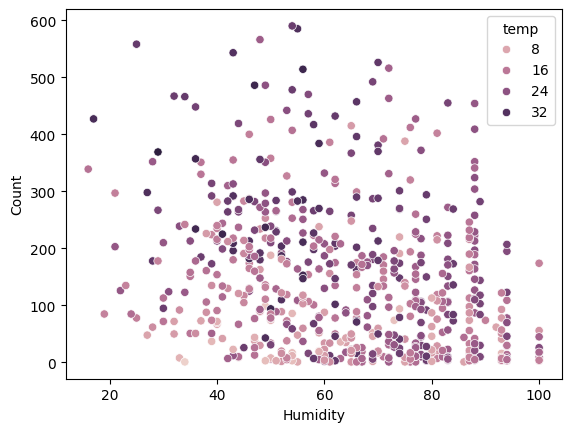

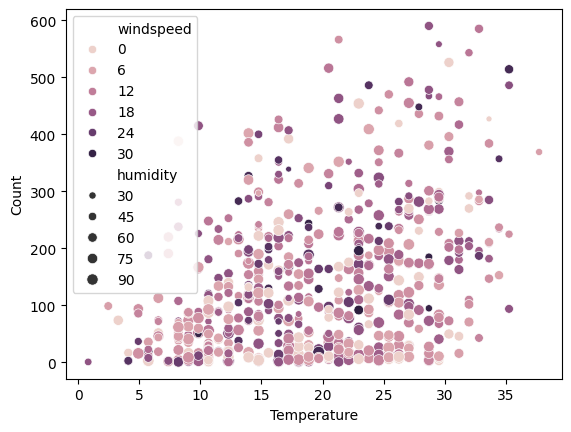

In [11]:
# Visualization of Data
# Season vs Count
sns.barplot(data=df, x='season', y='count')
plt.grid()
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Weather vs Count
sns.barplot(data=df, x='weather', y='count')
plt.grid()
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

# Boxplot of count by season and weather
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(data=df, x='season', y='count', hue='weather', ax=ax)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Creating true_holiday feature
data['true_holiday'] = 0
data.loc[(data['holiday'] == 1) & (data['workingday'] == 0), 'true_holiday'] = 1
data['true_holiday'].replace({0: 'No holiday', 1: 'Holiday'}, inplace=True)
df = pd.concat([df, data['datetime']], axis=1, sort=False)

# Boxplot of count by season and true_holiday
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
sns.boxplot(data=data, x='season', y='count', hue='true_holiday')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Boxplot of count by season and workingday
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
sns.boxplot(data=df, x='season', y='count', hue='workingday', ax=ax)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Lineplot of temperature vs count
sns.lineplot(data=df, x='temp', y='count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# Lineplot of windspeed vs count
sns.lineplot(data=df, x='windspeed', y='count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

# Scatterplot of humidity vs count
sns.scatterplot(data=df.iloc[::15], x='humidity', y='count', hue='temp')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

# Scatterplot of temp vs count with windspeed and humidity
sns.scatterplot(data=df.iloc[::15], x='temp', y='count', hue='windspeed', size='humidity')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [6]:
# Two Sample T-test on Numerical data
# Considering significance level at 5% , alpha : 0.05
# H0 : The two groups have no variable effect on the sales.
# HA : The two groups have considerable effect on the sales.

# Temperature: Spring vs Winter
group1 = df[df['season'] == 'Spring']['temp']
group2 = df[df['season'] == 'Winter']['temp']
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("Temperature: Spring vs Winter")
print("t-statistic:", t_stat, "p-value:", p_val)
if p_val < 0.05:
    print("The means of the two groups are significantly different.")
else:
    print("The means of the two groups are not significantly different.")

Temperature: Spring vs Winter
t-statistic: -28.477884849515736 p-value: 7.98428907168086e-165
The means of the two groups are significantly different.


In [12]:
# Temperature: Summer vs Fall
group1 = df[df['season'] == 'Summer']['temp']
group2 = df[df['season'] == 'Fall']['temp']
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("Temperature: Summer vs Fall")
print("t-statistic:", t_stat, "p-value:", p_val)
if p_val < 0.05:
    print("The means of the two groups are significantly different.")
else:
    print("The means of the two groups are not significantly different.")

# Apparent Temperature: Spring vs Winter
group1 = df[df['season'] == 'Spring']['atemp']
group2 = df[df['season'] == 'Winter']['atemp']
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("Apparent Temperature: Spring vs Winter")
print("t-statistic:", t_stat, "p-value:", p_val)
if p_val < 0.05:
    print("The means of the two groups are significantly different.")
else:
    print("The means of the two groups are not significantly different.")


Temperature: Summer vs Fall
t-statistic: -45.12533809384084 p-value: 0.0
The means of the two groups are significantly different.
Apparent Temperature: Spring vs Winter
t-statistic: -28.935180723889687 p-value: 1.5393461720698962e-169
The means of the two groups are significantly different.
